# More on Arrays and Vectorization

### Constructing Arrays using Comprehensions

*Comprehension syntax* is a a more general way to create arrays based on expressions.
It has the following form:

```
A = [ F(x,y,...) for x=rx, y=ry, ... ]
```

The function `F(x,y,...)` will be evaluated with the values `x`, `y`, etc, taking on each value in their given lists. The resulting values are put in a multi-dimensional array, of the size given by the variable ranges `rx`, `ry`, etc.

In [1]:
x = [ x^2 for x = 1:5 ]                # Square of the numbers 1 to 5

5-element Array{Int64,1}:
  1
  4
  9
 16
 25

In [2]:
A = [ x+y for x = 1:3, y = 1:5 ]       # 3x5 matrix with entries A_ij = i + j

3×5 Array{Int64,2}:
 2  3  4  5  6
 3  4  5  6  7
 4  5  6  7  8

In [3]:
B = [ x^y for x = 1:3, y = 1:5 ]       # 3x5 matrix with entries A_ij = i^j

3×5 Array{Int64,2}:
 1  1   1   1    1
 2  4   8  16   32
 3  9  27  81  243

The generated values can also be filtered using the `if` keyword, that is, the value will only be included in the array if the condition after `if` is true:

In [4]:
x = [ x^2 for x = 1:10 if x%3 == 0]    # Only for x that are multiples of 3

3-element Array{Int64,1}:
  9
 36
 81

Like before, the data type of the elements in the array will be determined based on the values, but can also be enforced by putting the type name before the brackets:

In [5]:
y = Float64[ rand(-5:5) for i = 1:2, j = 1:10 ]

2×10 Array{Float64,2}:
 -3.0  -4.0   0.0  -5.0  4.0  -2.0  -1.0   0.0  -3.0   0.0
  3.0  -3.0  -2.0  -1.0  3.0  -5.0  -2.0  -2.0  -5.0  -2.0

#### Generator expressions

If you remove the brackets from a comprehension, you create a *generator expression*. It can be seen as a rule that produces the requested values on demand, without allocating an array to store them. Parentheses are needed to separate the generator from other elements:

In [6]:
gen = (i*(i-1) for i = 1:10)        # A generator expression

Base.Generator{UnitRange{Int64},getfield(Main, Symbol("##13#14"))}(getfield(Main, Symbol("##13#14"))(), 1:10)

In [7]:
for x in gen                        # Loop over all the values in the generator expression
    print(x, " ")
end

0 2 6 12 20 30 42 56 72 90 

### More on creating arrays

Some other useful functions for creating arrays include the `reshape` function, which takes the data from one array and rearranges it into new dimensions:

In [8]:
reshape(1:15, 3, 5)

3×5 reshape(::UnitRange{Int64}, 3, 5) with eltype Int64:
 1  4  7  10  13
 2  5  8  11  14
 3  6  9  12  15

Note how the elements are assigned column-wise, that is, first into column 1, then column 2, etc. If you want to assign by rows, you can use the `permutedims` function (which is strongly related to the *transpose* of a matrix in linear algebra, more on this later):

In [9]:
permutedims(reshape(1:15, 5, 3))

3×5 Array{Int64,2}:
  1   2   3   4   5
  6   7   8   9  10
 11  12  13  14  15

Note how the inner matrix is of dimensions 5x3, so that after permutation the size is 3x5 just like before.

The `repeat` function repeats the entries of a given matrix according to a specified pattern. In its simplest form, it just copies the array:

In [10]:
repeat(1:2, 3)

6-element Array{Int64,1}:
 1
 2
 1
 2
 1
 2

but it also works for multi-dimensional arrays:

In [11]:
repeat(1:2, 3, 4)

6×4 Array{Int64,2}:
 1  1  1  1
 2  2  2  2
 1  1  1  1
 2  2  2  2
 1  1  1  1
 2  2  2  2

In [12]:
repeat([1 2; 3 4], 1, 2)

2×4 Array{Int64,2}:
 1  2  1  2
 3  4  3  4

### Array functions

We have seen before how many for-loops over arrays can be avoided using e.g. the dot-operator, which evaluates functions and operators element-wise. A number of other helper functions are available to extend this so-called *vectorization* technique, and allow for shorter code that is easier to understand and which might execute faster.

For example, a very common operation is to sum all the elements of an array. While this is easy to do with a for-loop, the function `sum` makes it even easier:

In [13]:
x = rand(1:100, 5)
println("Sum of ", x, " = ", sum(x))

Sum of [61, 53, 95, 46, 51] = 306


The `sum` function can also take an additional dimension argument `dims`, to specify which dimension it should add along. For example, it can add all the elements in each column (along dimension 1, producing a vector of sums):

In [14]:
A = rand(-100:100, 3, 5)

3×5 Array{Int64,2}:
 -43   49   47  -66  -66
  64   46  -75   10  -64
  91  -18  -48  -73  -87

In [15]:
sum(A, dims=1)

1×5 Array{Int64,2}:
 112  77  -76  -129  -217

or it can add all the elements in each row (along dimension 2):

In [16]:
sum(A, dims=2)

3×1 Array{Int64,2}:
  -79
  -19
 -135

Note that while these functions reduce a 2D array to a 1D array, the output is still a 2D array (a row of a column vector). The syntax [:] after any array will convert it to a 1D array, which might be needed for example when using the array as indices.

In [17]:
sum(A, dims=1)[:]

5-element Array{Int64,1}:
  112
   77
  -76
 -129
 -217

Some other examples of these so-called *array reduction* functions are shown below.

In [18]:
x = rand(1:100, 5)
display(x)
prod(x)                         # Product of all elements

5-element Array{Int64,1}:
 87
 19
 60
 45
 96

428457600

In [19]:
display(A)
display(maximum(A, dims=1))     # Largest element in each column
display(minimum(A, dims=1))     # Smallest element in each column

3×5 Array{Int64,2}:
 -43   49   47  -66  -66
  64   46  -75   10  -64
  91  -18  -48  -73  -87

1×5 Array{Int64,2}:
 91  49  47  10  -64

1×5 Array{Int64,2}:
 -43  -18  -75  -73  -87

The *cumulative* sum and product functions work in a similar way, but produce arrays of the same size as the original array:

In [20]:
x = 1:5
display(cumsum(x))                   # Cumulative sum, that is, entry n is the sum of x_1,...,x_n
display(cumprod(x))                  # Cumulative product

5-element Array{Int64,1}:
  1
  3
  6
 10
 15

5-element Array{Int64,1}:
   1
   2
   6
  24
 120

In [21]:
A = reshape(1:6, 2, 3)

2×3 reshape(::UnitRange{Int64}, 2, 3) with eltype Int64:
 1  3  5
 2  4  6

In [22]:
cumsum(A, dims=1)                    # Cumulative sum along dimension 1 (that is, column-wise)

2×3 Array{Int64,2}:
 1  3   5
 3  7  11

In [23]:
cumprod(A, dims=2)                   # Cumulative product along dimension 2

2×3 Array{Int64,2}:
 1  3  15
 2  8  48

### Example: Taylor polynomial using array functions

In part 1, we used for-loops to evaluate the Taylor polynomial for $\cos x$ of a given degree $2n$:

```julia
function taylor_cos(x,n)
    term = 1
    y = 1
    for k = 1:n
        term *= -x^2 / ((2k-1) * 2k)
        y += term
    end
    y
end
```

We can rewrite this in a vectorized form by using the `cumprod` and the `sum` functions. Note that each term in the sum is built up by multiplying the previous term by the expression `-x^2 / ((2k-1) * 2k)`. This means we can create a vector with these values, and create *all* the terms using the `cumprod` function. Finally, the Taylor polynomial is obtained by adding all the terms using the `sum` function, and manually adding the first term 1 which is a special case:

In [24]:
function taylor_cos(x,n)
    factors = [ -x^2 / ((2k-1) * 2k) for k = 1:n ]
    y = 1 + sum(cumprod(factors))
end

taylor_cos (generic function with 1 method)

In [25]:
println(taylor_cos(10, 50)) # Taylor approximation
println(cos(10))            # true value

-0.8390715290752269
-0.8390715290764524


Since we now know how to plot functions, let us make the typical calculus plot that compares Taylor polynomial approximations of different degrees. Note how we can generate a 2D array `yy_taylor` of 6 different Taylor polynomials, for all values of `x`, using an array comprehension.

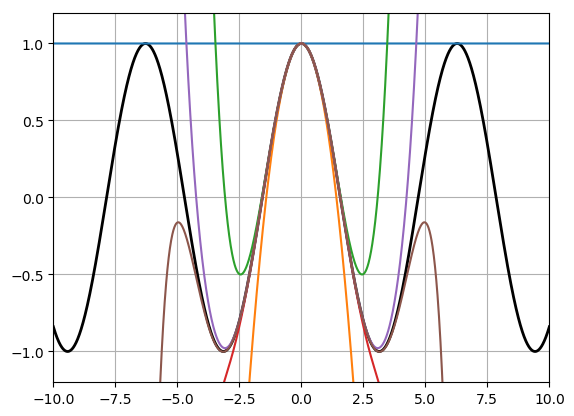

In [26]:
xx = -10:0.01:10
yy = cos.(xx)
yy_taylor = [ taylor_cos(x,n) for x in xx, n in 0:5 ]

using PyPlot
plot(xx, yy, linewidth=2, color="k")
plot(xx, yy_taylor)
grid(true)
axis([-10,10,-1.2,1.2]);

### Array functions for indices and booleans

Another useful set of array functions are based on indices and boolean variables. For example, the `in` function (or the $\in$ symbol) will loop through an array and return `true` if a given number appears anywhere in the array:

In [27]:
x = 1:2:1000                 # Odd numbers
println(503 in x)            # True, 503 is in the list
println(1000 ∈ x)            # False, 1000 is not in the list

true
false


The `all` function returns `true` if all elements in a boolean array are `true`:

In [28]:
println(all(x .< 500))
println(all(x .> 0))

false
true


The `any` function returns `true` if any element in a boolean array is `true`:

In [29]:
println(any(x .== 503))
println(any(x .== 1000))

true
false


We can also find the *index* of e.g. the first element that is `true` in a boolean array:

In [30]:
idx = findfirst(x .== 503)    # Index in x with the value 503

252

or more generally, a vector with the indices to *all* the elements that are `true`:

In [31]:
ind = findall(@. x % 97 == 0)
println("Indices in x with numbers that are multiples of 97: ", ind)

Indices in x with numbers that are multiples of 97: [49, 146, 243, 340, 437]


Finally, the `count` function returns the number of times `true` appears in a boolean array:

In [32]:
count(@. x % 97 == 0)

5

### Logical indexing

As an alternative to indexing an array by `x[idx]` where `idx` is an array of integers, *logical indexing* allows for the syntax `x[choose]` where `choose` is an array of booleans. The size of `choose` must be the length of the array (or more generally, the dimension it indexes into). Note that the result is identical to `x[findall(choose)]`, but shorter to write and likely more efficient. 

In [33]:
x = -11:11
y = sin.(x)
x = x[y .> 0]          # Only keep values of x where y=sin x is positive

11-element Array{Int64,1}:
 -11
 -10
  -6
  -5
  -4
   1
   2
   3
   7
   8
   9

In [34]:
# Example: Consider the matrix
A = rand(-10:10, 3, 10)

3×10 Array{Int64,2}:
  9  -1  -10   2   9  -5  -3  -1  3  -4
  7  -9   -8  -9  -4   8   0  -8  9  -7
 10  10    5  -5   9   4  10  -1  2  -2

In [35]:
# Compute a boolean array with `true` if the column sums are >=0
pick = sum(A, dims=1) .≥ 0

1×10 BitArray{2}:
 true  true  false  false  true  true  true  false  true  false

In [36]:
# Create a new vector with only the columns of A given by the `pick` variable
# Note that since `pick` is a 2D vector (row vector), we use [:] before indexing
B = A[:, pick[:]]

3×6 Array{Int64,2}:
  9  -1   9  -5  -3  3
  7  -9  -4   8   0  9
 10  10   9   4  10  2

### Examples: Simplifying the Sieve of Eratosthenes function

In our previous implementation, we used the code below to collect all the prime numbers:
```julia
    ...
    # Return an array with all prime numbers
    primes = Int64[]
    for i = 2:n
        if prime[i]
            push!(primes, i)
        end
    end
    primes
    ...
```
Using array comprehensions, we can replace this entire part of the code by a single line:
```julia
    primes = [ i for i = 2:n if prime[i] ]
```
or even simpler, since the list of primes is simply the indices of the `true` values in the array `prime`, we can use the `findall` function. However in our original implementation, `prime[1]` was set to `true` (since it was not used) so we have to first make sure the number 1 is not considered a prime. Then the code can be written as:
```julia
    prime[1] = false
    primes = findall(prime)
```

### Example: Simplifying the dart-throwing function

We previously used the following code to count the number of "hits", that is, how many points in the vectors `x`,`y` are inside the unit circle:
```julia
# Determine if points are inside the circle (a "hit")
hits = 0
for i = 1:n
    if x[i]^2 + y[i]^2 ≤ 1
        hits += 1
    end
end
```
Using the `count` function, this can be written as a single line of code:
```julia
hits = count(@. x^2 + y^2 ≤ 1)
```

### Example: Simplifying the poker hand flush code

When simulating the poker hands, we used the following code to determine if all cards were of the same suit:
```julia
    same_suit = true
    for i = 2:5
        if suits[i] ≠ suits[1]
            same_suit = false
            break
        end
    end
```
Using the `all` function, this can be simplified to a single line of code:
```julia
    same_suit = all(suits[2:5] .== suits[1])
```